In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

In [10]:
spectra_contsep_j193747_1 = Table.read("mansiclass/spec_auto_contsep_lstep1__crr_b_ifu20211023_02_16_15_RCB-J193747.txt", format = "ascii")
spectra_robot_j193747_1 = Table.read("mansiclass/spec_auto_robot_lstep1__crr_b_ifu20211023_02_16_15_RCB-J193747.txt", format = "ascii")

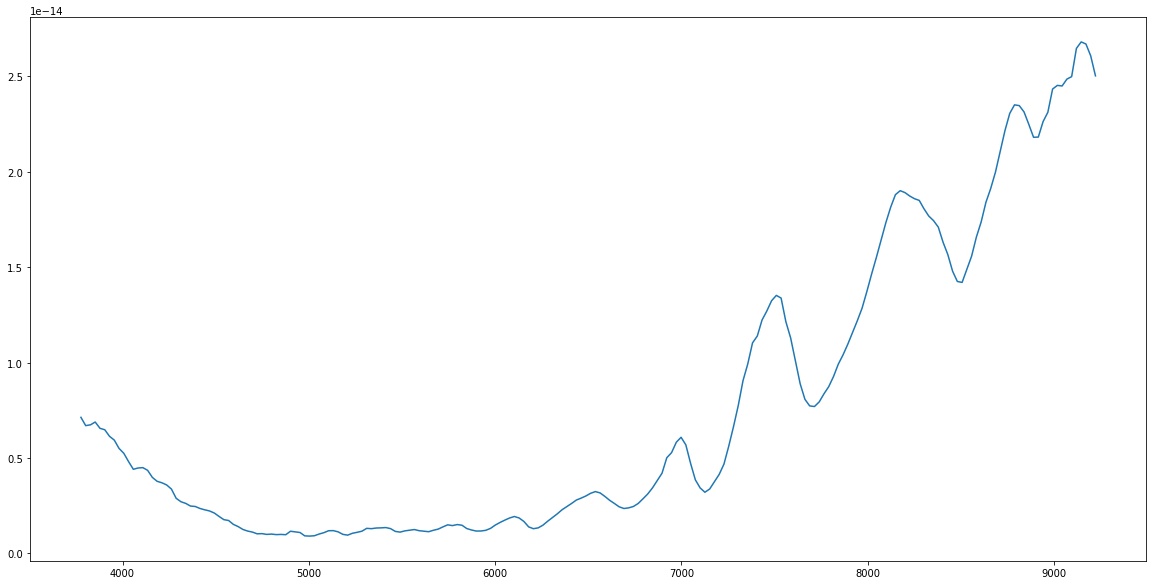

In [11]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193747_1["col1"], spectra_contsep_j193747_1["col2"])

In [12]:
spectra_contsep_j193747_2 = Table.read("mansiclass/spec_auto_contsep_lstep1__crr_b_ifu20211023_02_35_52_RCB-J193747.txt", format = "ascii")
spectra_robot_j193747_2 = Table.read("mansiclass/spec_auto_robot_lstep1__crr_b_ifu20211023_02_35_52_RCB-J193747.txt", format = "ascii")

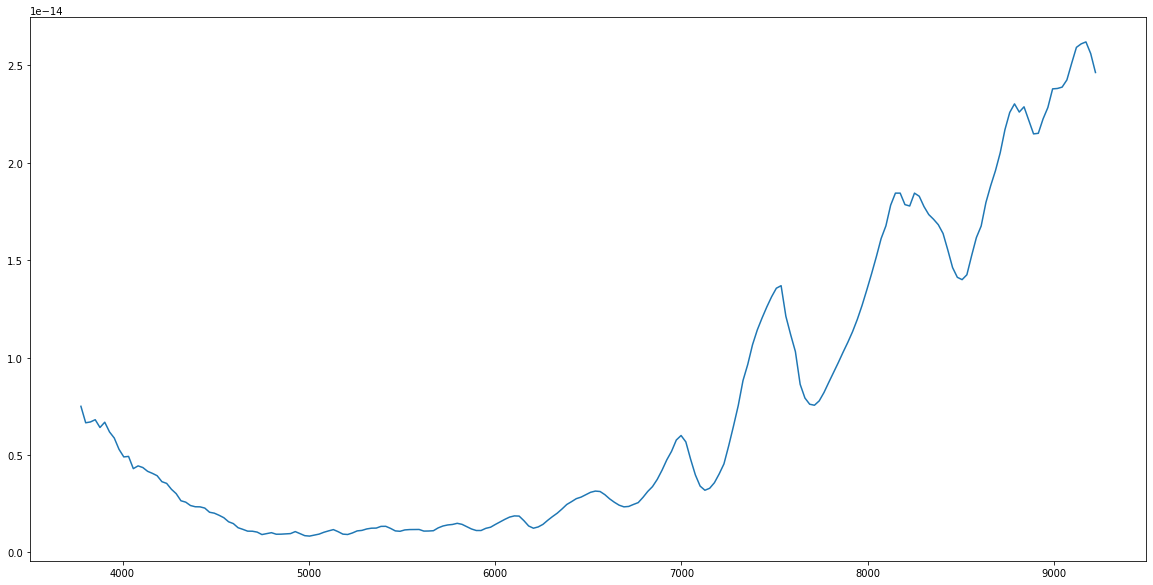

In [13]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193747_2["col1"], spectra_contsep_j193747_2["col2"])
#plt.vlines(8500, 0, np.max(spectra_contsep_j193747_2["col2"]))

Text(0, 0.5, 'Relative Flux')

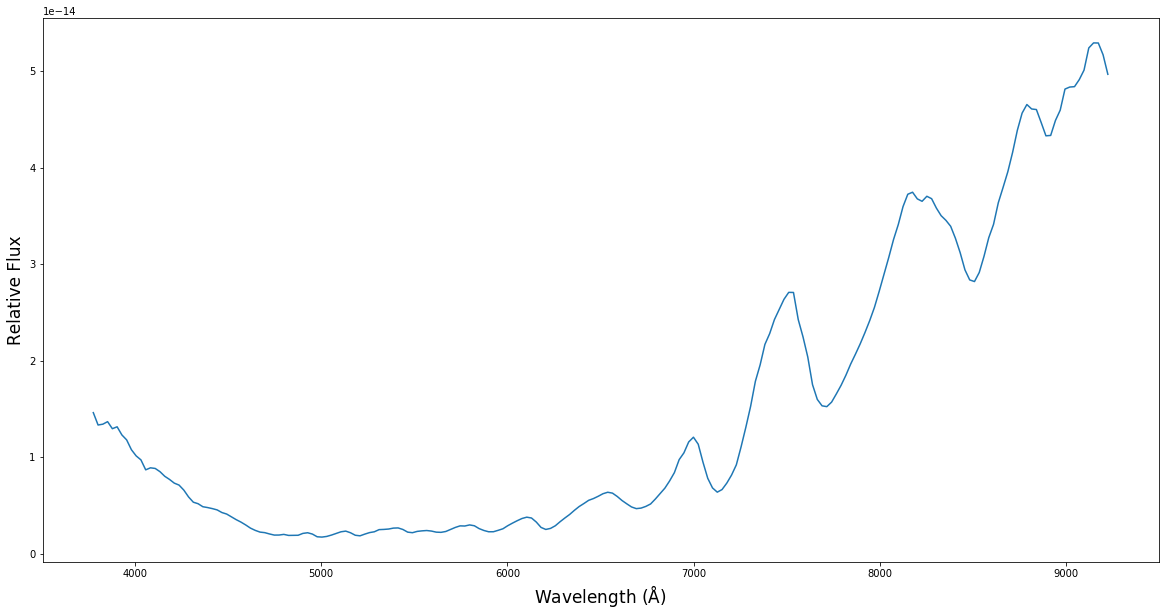

In [15]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193747_2["col1"], spectra_contsep_j193747_2["col2"] + spectra_contsep_j193747_1["col2"])
plt.xlabel(r'Wavelength ($\mathrm{\AA}$)', fontsize=17)
plt.ylabel('Relative Flux', fontsize=17)

In [16]:
spectra_contsep_j193015_1 = Table.read("mansiclass/spec_auto_contsep_lstep1__crr_b_ifu20211023_02_55_33_RCB-J193015.txt", format = "ascii")
spectra_robot_j193015_1 = Table.read("mansiclass/spec_auto_robot_lstep1__crr_b_ifu20211023_02_55_33_RCB-J193015.txt", format = "ascii")

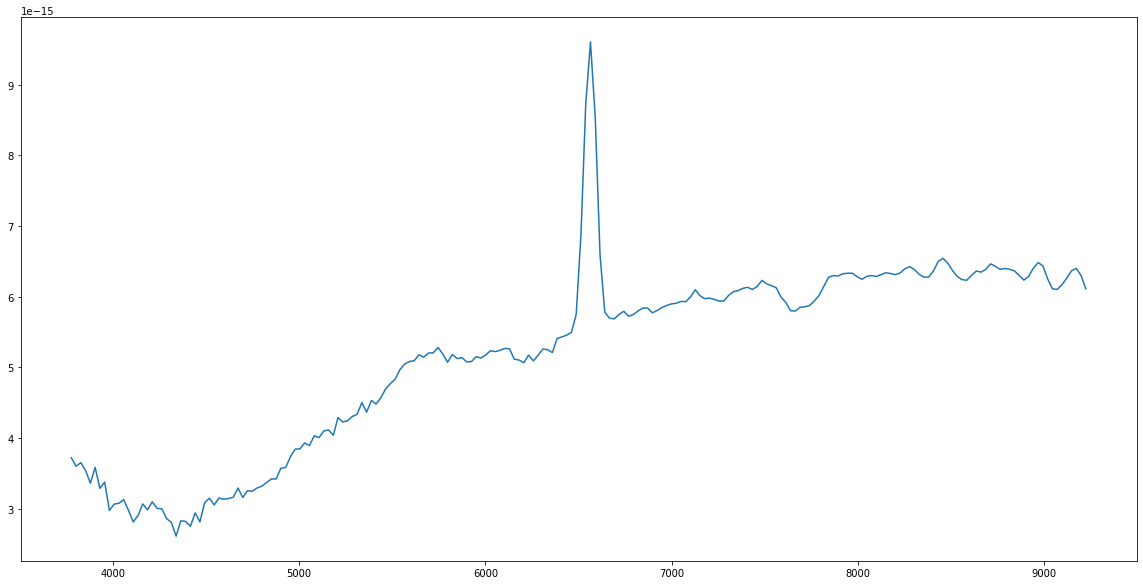

In [17]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193015_1["col1"], spectra_contsep_j193015_1["col2"])

In [18]:
spectra_contsep_j193015_2 = Table.read("mansiclass/spec_auto_contsep_lstep1__crr_b_ifu20211023_03_10_45_RCB-J193015.txt", format = "ascii")
spectra_robot_j193015_2 = Table.read("mansiclass/spec_auto_robot_lstep1__crr_b_ifu20211023_03_10_45_RCB-J193015.txt", format = "ascii")

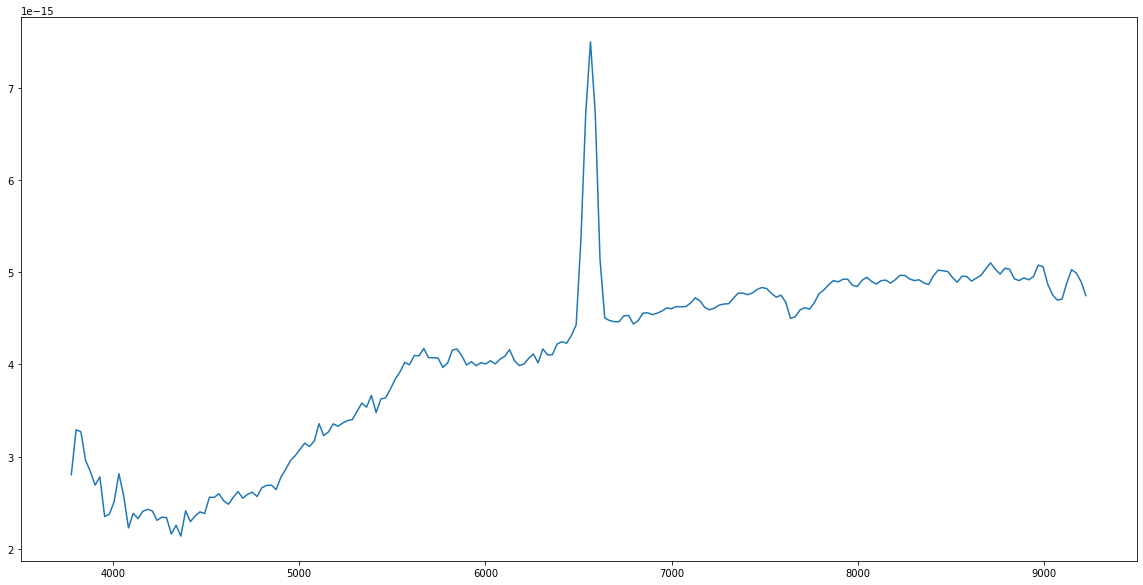

In [19]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193015_2["col1"], spectra_contsep_j193015_2["col2"])

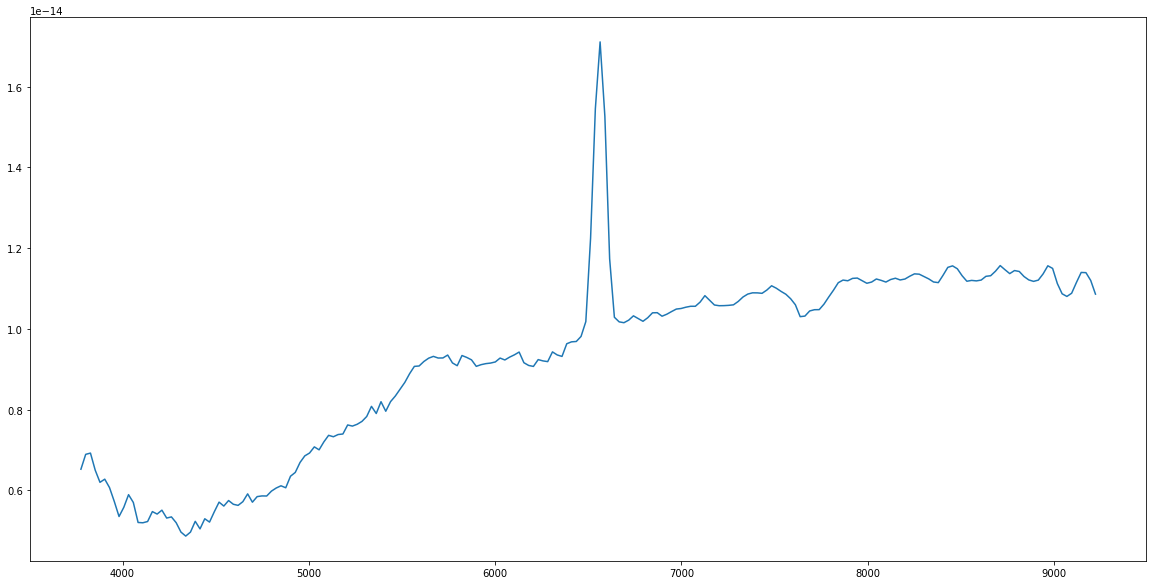

In [20]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193015_2["col1"], spectra_contsep_j193015_1["col2"] + spectra_contsep_j193015_2["col2"])

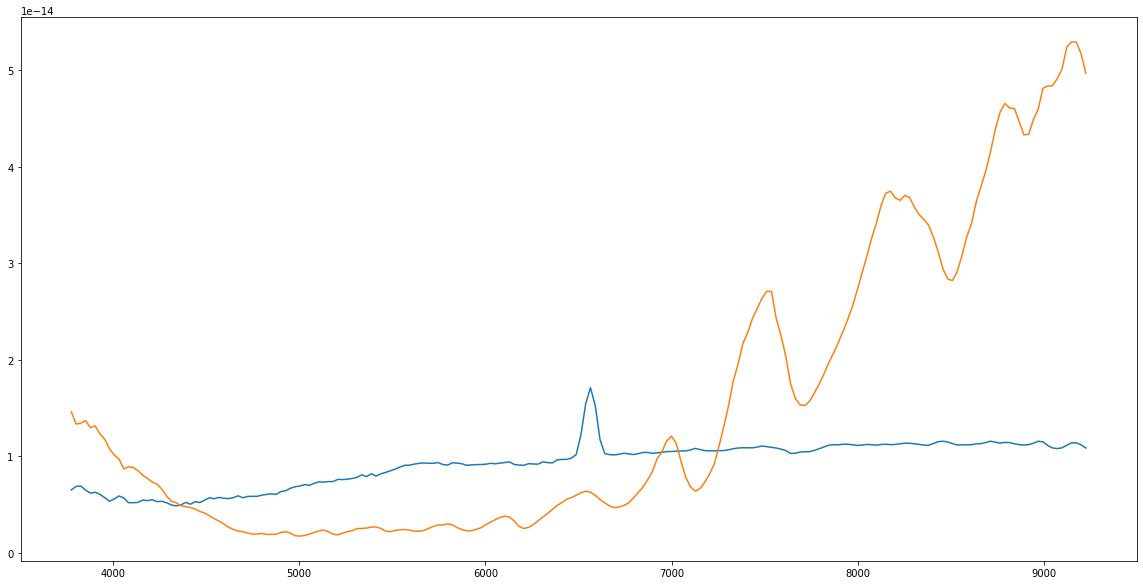

In [21]:
fig = plt.figure(figsize = (20,10))
plt.plot(spectra_contsep_j193015_2["col1"], spectra_contsep_j193015_1["col2"] + spectra_contsep_j193015_2["col2"])
plt.plot(spectra_contsep_j193747_2["col1"], spectra_contsep_j193747_2["col2"] + spectra_contsep_j193747_1["col2"])

In [31]:
items = Table.from_pandas(pd.read_csv("visible.csv"))

In [34]:
wanted = items[np.where(items["WiseID"] == "J193015.49+192051.7")[0]]

In [35]:
distance = 1/(wanted["parallax"]/1000)
absolute_M = wanted["phot_g_mean_mag"] - 5 * np.log10(distance)

In [42]:
wanted["parrallax_over_error"]

KeyError: 'parrallax_over_error'

In [44]:
wanted["parallax_over_error"]

13.124812


In [36]:
distance

4469.676923576386


In [37]:
absolute_M

-4.3397716633343695


In [41]:
wanted["bp_g"]

0.789176


In [58]:
wanted

Unnamed: 0,_RAJ2000,_DEJ2000,ID,WiseID,RAJ2000,DEJ2000,__3_4_,e__3_4_,__4_6_,e__4_6_,__12_,e__12_,__22_,e__22_,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,SName,SType,SSpClass,recno,dist,table1_oid,col_raj2000,col_dej2000,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,airmass,alt,az,moon_sep
int64,float64,float64,int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str23,str4,str10,int64,float64,int64,float64,float64,int64,str29,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
37,292.56457810000006,19.3477017,2887,J193015.49+192051.7,292.56457810000006,19.3477017,6.966,0.028999999999999998,5.7860000000000005,0.027000000000000003,3.322,0.013000000000000001,1.976,0.019,13.543,0.040999999999999995,11.7,0.036000000000000004,9.571,0.02,2MASS_J19301550+1920517,*,--,1672,2.833883240273136e-05,1672,292.56457810000006,19.3477017,1636042515805110273,Gaia EDR3 4323450973685394176,4323450973685394176,504225991,2016.0,292.5645571345983,0.009559513,19.347681407489628,0.012207609,0.22372981696400907,0.017046325,13.124812,5.9284324999999995,-2.5044581111209103,0.015867528,-5.373453287250444,0.015986063999999998,0.4986667,-0.15664822,0.06516893,0.030430928,-0.022881252999999997,-0.0030874189,0.042554345,-0.17489512,-0.18858594,0.19617161,587,0,585,2,-0.8679879,527.17896,0.0,1.6689803000000001e-15,31,False,1.3888211000000001,--,--,--,--,--,--,--,67,22,0.024306003,69,13,0,0.055840388,113.26404,0,0,0.9740538000000001,0.516011,0.54202574,0.34918237,0.

In [47]:
table = astropy.io.fits.open("spec_rcb2894_rcb1536_85.fits")

In [52]:
table[0].data[0]

array([[1.8771642, 1.8774523, 1.8777403, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [53]:
table.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x000001BF7501A898>]>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


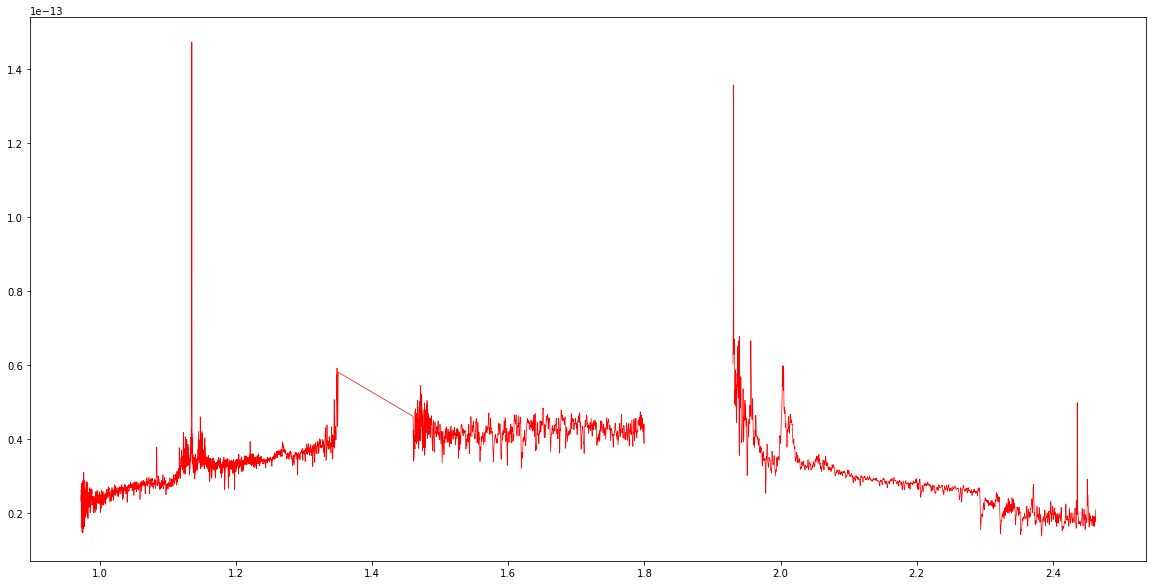

In [56]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,10))
specfile = 'spec_rcb2894_rcb1536_85.fits'
spec = fits.open(specfile)
data = spec[0].data
wavs = np.ndarray.flatten(np.array([data[3][0],data[2][0],data[1][0],data[0][0]]))
fluxes = np.ndarray.flatten(np.array([data[3][1],data[2][1],data[1][1],data[0][1]]))    
wavmask = ((wavs<1.46) & (wavs>1.35)) | ((wavs<1.93) & (wavs>1.8))
wavmask = np.invert(wavmask)
plt.plot(wavs[wavmask],fluxes[wavmask],linewidth=0.7,c='r')

In [57]:
wanted

Unnamed: 0,_RAJ2000,_DEJ2000,ID,WiseID,RAJ2000,DEJ2000,__3_4_,e__3_4_,__4_6_,e__4_6_,__12_,e__12_,__22_,e__22_,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,SName,SType,SSpClass,recno,dist,table1_oid,col_raj2000,col_dej2000,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,phot_bp_rp_excess_factor,bp_rp,bp_g,g_rp,dr2_radial_velocity,dr2_radial_velocity_error,dr2_rv_nb_transits,dr2_rv_template_teff,dr2_rv_template_logg,dr2_rv_template_fe_h,l,b,ecl_lon,ecl_lat,airmass,alt,az,moon_sep
int64,float64,float64,int64,str19,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str23,str4,str10,int64,float64,int64,float64,float64,int64,str29,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
37,292.56457810000006,19.3477017,2887,J193015.49+192051.7,292.56457810000006,19.3477017,6.966,0.028999999999999998,5.7860000000000005,0.027000000000000003,3.322,0.013000000000000001,1.976,0.019,13.543,0.040999999999999995,11.7,0.036000000000000004,9.571,0.02,2MASS_J19301550+1920517,*,--,1672,2.833883240273136e-05,1672,292.56457810000006,19.3477017,1636042515805110273,Gaia EDR3 4323450973685394176,4323450973685394176,504225991,2016.0,292.5645571345983,0.009559513,19.347681407489628,0.012207609,0.22372981696400907,0.017046325,13.124812,5.9284324999999995,-2.5044581111209103,0.015867528,-5.373453287250444,0.015986063999999998,0.4986667,-0.15664822,0.06516893,0.030430928,-0.022881252999999997,-0.0030874189,0.042554345,-0.17489512,-0.18858594,0.19617161,587,0,585,2,-0.8679879,527.17896,0.0,1.6689803000000001e-15,31,False,1.3888211000000001,--,--,--,--,--,--,--,67,22,0.024306003,69,13,0,0.055840388,113.26404,0,0,0.9740538000000001,0.516011,0.54202574,0.34918237,0.

In [62]:
from scipy.optimize import curve_fit
import pylab as plt
import numpy as np

def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))

In [66]:
def func(wa, T1, T2):
    return blackbody_lam(wa, T1) + blackbody_lam(wa, T2)

In [91]:
sigma = spectra_contsep_j193015_1["col3"]
ydata = spectra_contsep_j193015_1["col2"]
wa = spectra_contsep_j193015_1["col1"] * 10e-5

In [97]:
spectra_contsep_j193015_1["col2"]

3.72e-15
3.601e-15
3.651e-15
3.541e-15
3.36e-15
3.585e-15
3.288e-15
3.376e-15
2.975e-15
3.065e-15
3.077e-15


In [92]:
popt, pcov = curve_fit(func, wa, ydata, p0=(2000, 6000), sigma=sigma)

In [93]:
bestT1, bestT2 = popt
sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

In [94]:
ybest = blackbody_lam(wa, bestT1) + blackbody_lam(wa, bestT2)

In [95]:
print('Parameters of best-fitting model:')
print('  T1 = %.2f +/- %.2f' % (bestT1, sigmaT1))
print('  T2 = %.2f +/- %.2f' % (bestT2, sigmaT2))

Parameters of best-fitting model:
  T1 = 61.15 +/- inf
  T2 = 240.50 +/- inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


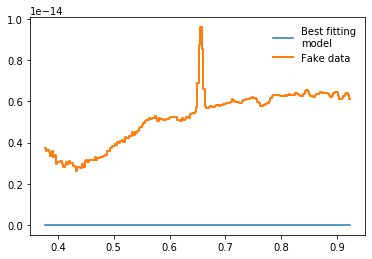

In [89]:
plt.plot(wa, ybest, label='Best fitting\nmodel')
plt.plot(wa, ydata, ls='steps-mid', lw=2, label='Fake data')
plt.legend(frameon=False)
plt.savefig('fit_bb.png')

True model values
  T1 = 5000.00
  T2 = 8000.00
Parameters of best-fitting model:
  T1 = 7932.53 +/- 102.35
  T2 = 5192.46 +/- 451.14


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


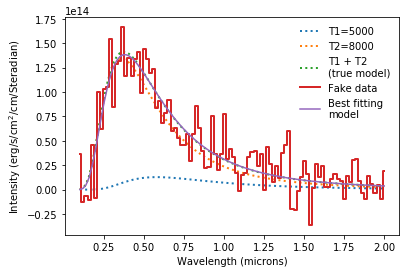

In [90]:
from scipy.optimize import curve_fit
import pylab as plt
import numpy as np

def blackbody_lam(lam, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian
    """
    from scipy.constants import h,k,c
    lam = 1e-6 * lam # convert to metres
    return 2*h*c**2 / (lam**5 * (np.exp(h*c / (lam*k*T)) - 1))

wa = np.linspace(0.1, 2, 100)   # wavelengths in um
T1 = 5000.
T2 = 8000.
y1 = blackbody_lam(wa, T1)
y2 = blackbody_lam(wa, T2)
ytot = y1 + y2

np.random.seed(1)

# make synthetic data with Gaussian errors

sigma = np.ones(len(wa)) * 1 * np.median(ytot)
ydata = ytot + np.random.randn(len(wa)) * sigma

# plot the input model and synthetic data

plt.figure()
plt.plot(wa, y1, ':', lw=2, label='T1=%.0f' % T1)
plt.plot(wa, y2, ':', lw=2, label='T2=%.0f' % T2)
plt.plot(wa, ytot, ':', lw=2, label='T1 + T2\n(true model)')
plt.plot(wa, ydata, ls='steps-mid', lw=2, label='Fake data')
plt.xlabel('Wavelength (microns)')
plt.ylabel('Intensity (erg/s/cm$^2$/cm/Steradian)')

# fit two blackbodies to the synthetic data

def func(wa, T1, T2):
    return blackbody_lam(wa, T1) + blackbody_lam(wa, T2)

# Note the initial guess values for T1 and T2 (p0 keyword below). They
# are quite different to the known true values, but not *too*
# different. If these are too far away from the solution curve_fit()
# will not be able to find a solution. This is not a Python-specific
# problem, it is true for almost every fitting algorithm for
# non-linear models. The initial guess is important!

popt, pcov = curve_fit(func, wa, ydata, p0=(1000, 3000), sigma=sigma)

# get the best fitting parameter values and their 1 sigma errors
# (assuming the parameters aren't strongly correlated).

bestT1, bestT2 = popt
sigmaT1, sigmaT2 = np.sqrt(np.diag(pcov))

ybest = blackbody_lam(wa, bestT1) + blackbody_lam(wa, bestT2)

print('True model values')
print('  T1 = %.2f' % T1)
print('  T2 = %.2f' % T2)

print('Parameters of best-fitting model:')
print('  T1 = %.2f +/- %.2f' % (bestT1, sigmaT1))
print('  T2 = %.2f +/- %.2f' % (bestT2, sigmaT2))
degrees_of_freedom = len(wa) - 2
resid = (ydata - func(wa, *popt)) / sigma
chisq = np.dot(resid, resid)

# plot the solution

plt.plot(wa, ybest, label='Best fitting\nmodel')
plt.legend(frameon=False)
plt.savefig('fit_bb.png')
plt.show()